In [27]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

import os
import sys
sys.path.append("../")

from utils.data import binary_LDS
from IBP_VI import IndianBuffetProcessInfiniteVI, IndianBuffetProcessFiniteVI

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X, weights = binary_LDS(num_samples=100, noise_scale=0.2, binary_prob=0.5)

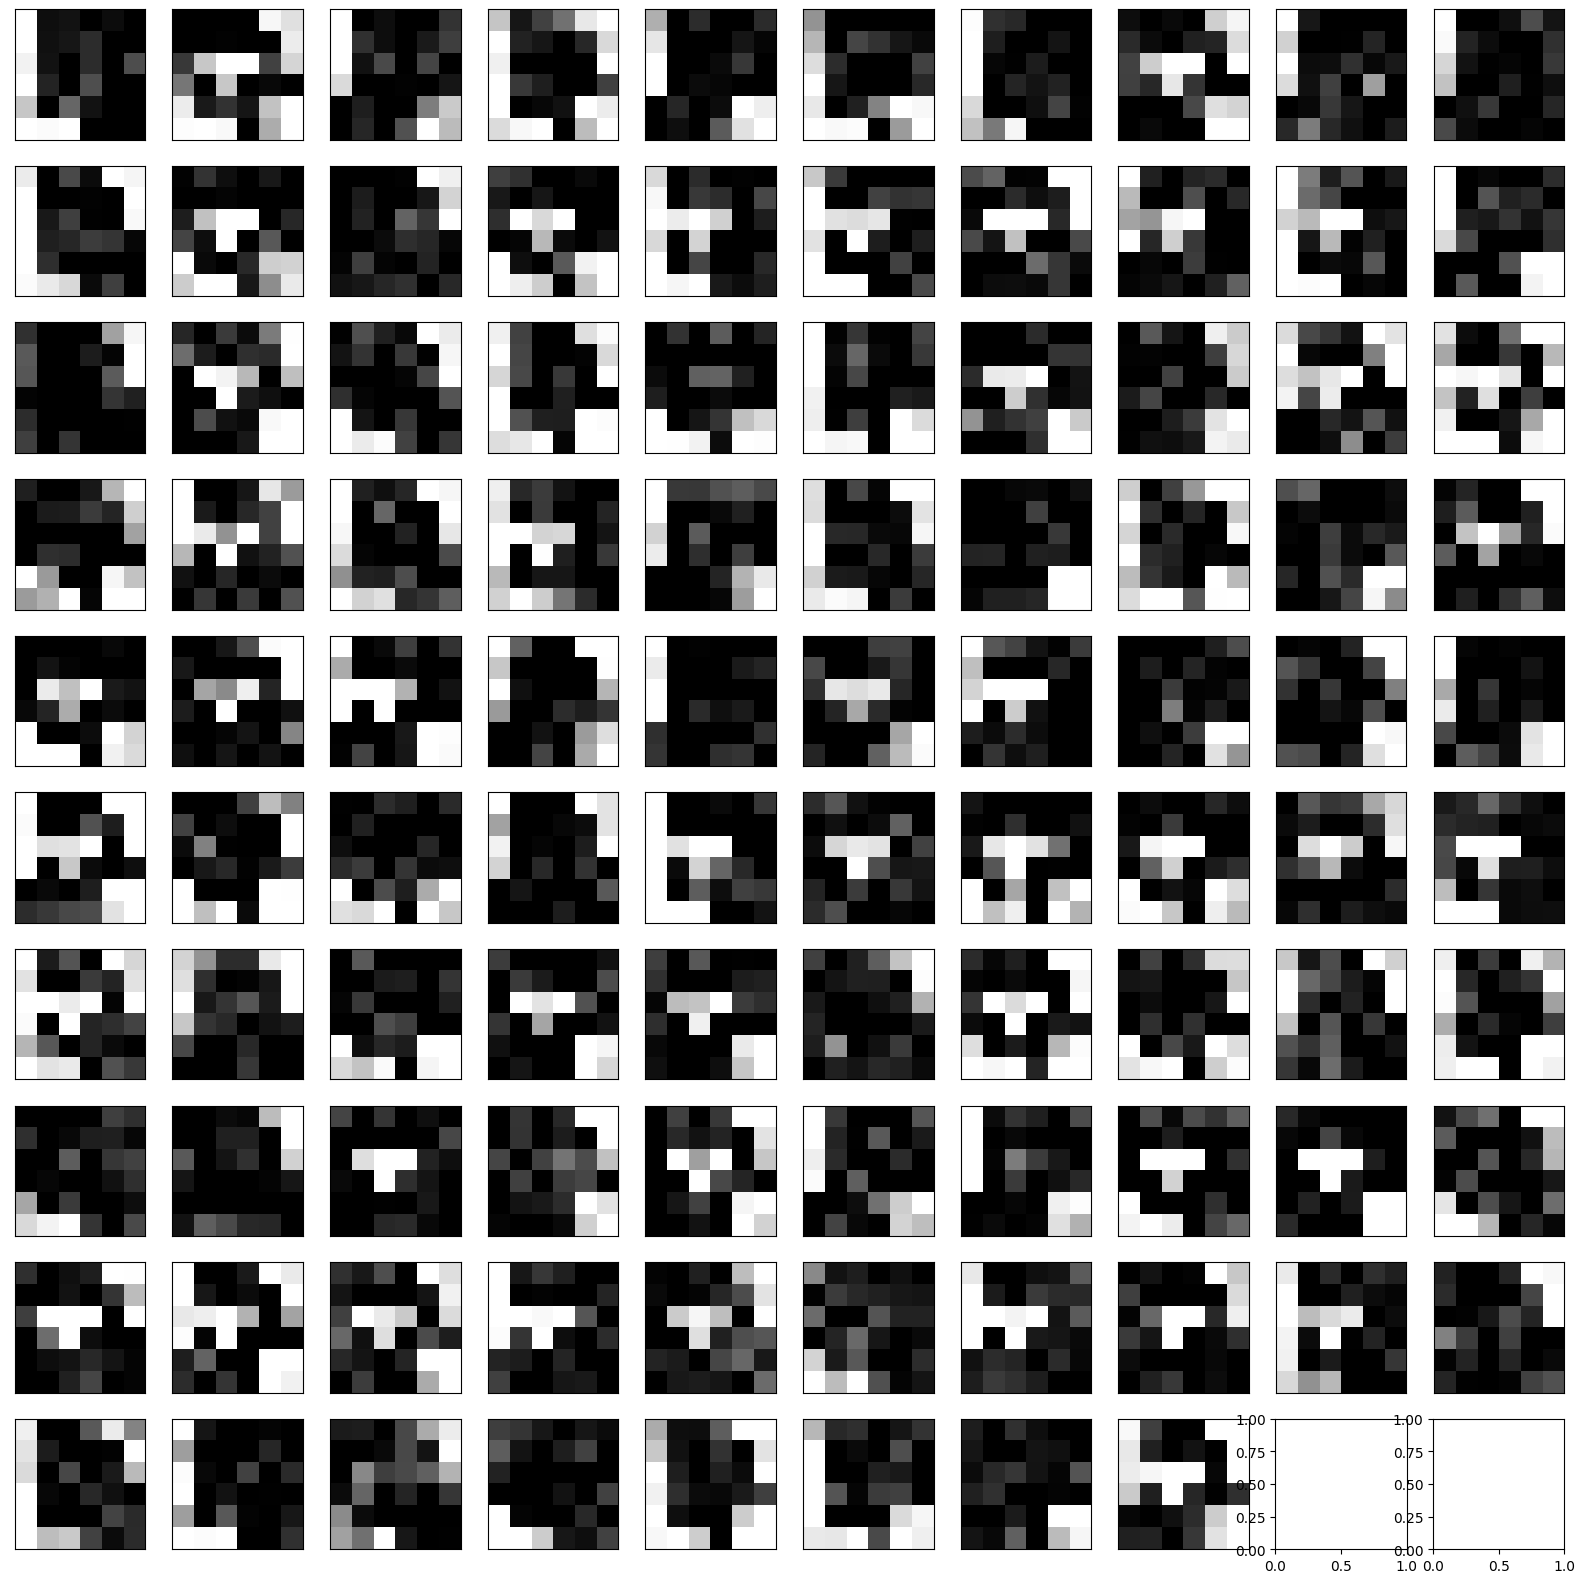

In [5]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(len(X)):
    ax[i // 10, i % 10].imshow(X[i].reshape(6, 6), cmap="gray", vmin=0.0, vmax=1.0)
    ax[i // 10, i % 10].set_xticks([])
    ax[i // 10, i % 10].set_yticks([])

In [6]:
K = 10
alpha = 1.5
sigmasq_A = 0.05
sigmasq_n = 0.05

IBP_VI_infinite = IndianBuffetProcessInfiniteVI(
    X=X, 
    K=K, 
    alpha=alpha, 
    sigmasq_A=sigmasq_A, 
    sigmasq_n=sigmasq_n, 
    verbose=False, 
    threshold=1e-10, 
    max_iter=1000, 
)

In [7]:
free_energy_history, converge = IBP_VI_infinite.fit()

free_energy=-37688.44: 100%|██████████| 1000/1000 [01:15<00:00, 13.20it/s]


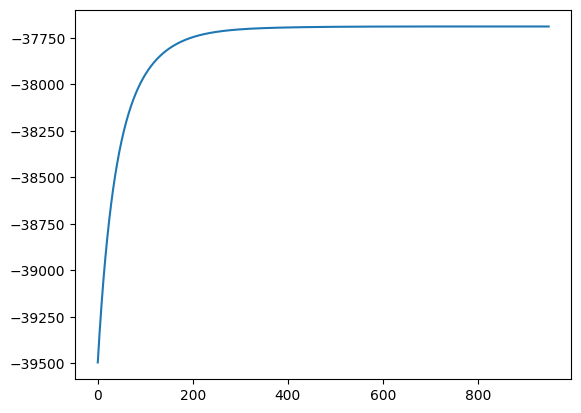

In [8]:
plt.plot(free_energy_history[50:])

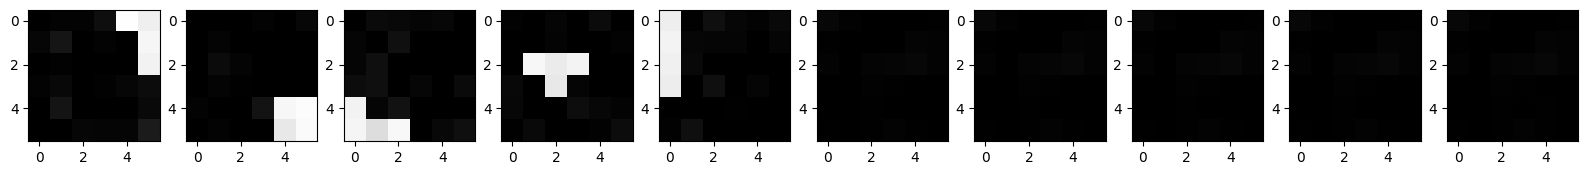

In [13]:
fig, ax = plt.subplots(1, K, figsize=(20, 3))
for i in range(K):
    ax[i].imshow(IBP_VI_infinite.m[i].reshape(6, 6), cmap="gray", vmin=0, vmax=1)

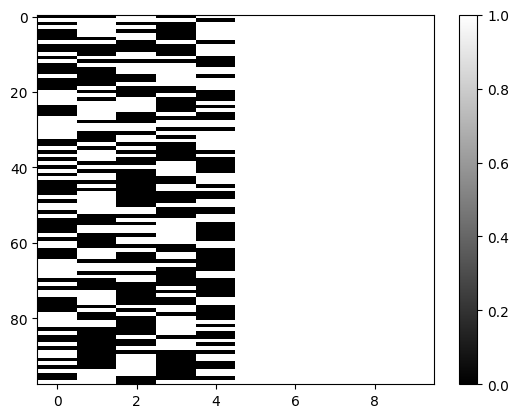

In [23]:
plt.imshow(IBP_VI_infinite.rho, cmap="gray")
ax = plt.gca()
ax.set_aspect('auto')
plt.colorbar()

In [42]:
IBP_VI_finite = IndianBuffetProcessFiniteVI(
    X=X, 
    K=K, 
    alpha=alpha, 
    sigmasq_A=sigmasq_A, 
    sigmasq_n=sigmasq_n, 
    threshold=1e-10, 
)

In [43]:
free_energy_history = IBP_VI_finite.fit()

free_energy=-34755.41: 100%|██████████| 100/100 [00:00<00:00, 144.91it/s]


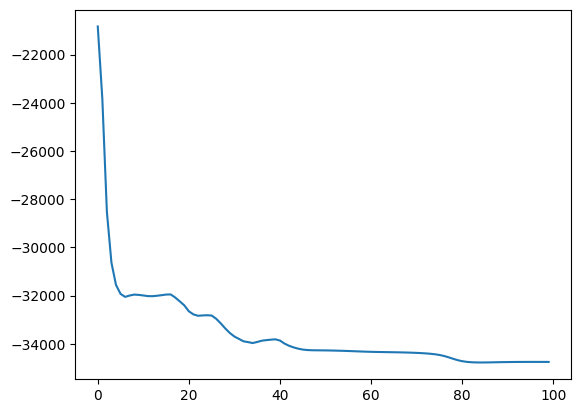

In [44]:
plt.plot(free_energy_history)

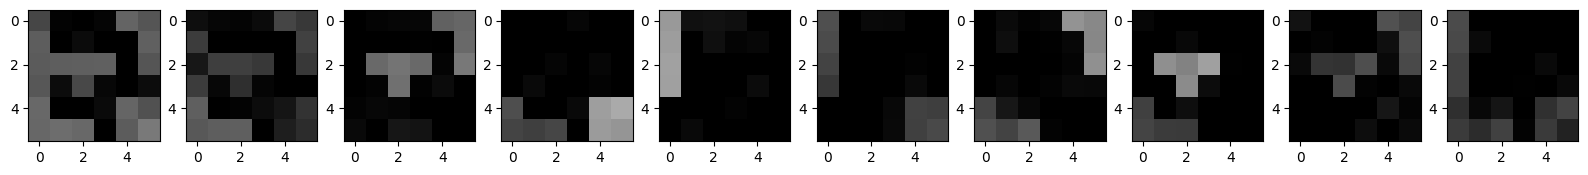

In [45]:
fig, ax = plt.subplots(1, K, figsize=(20, 3))
for i in range(K):
    ax[i].imshow(IBP_VI_finite.m[i].reshape(6, 6), cmap="gray", vmin=0, vmax=1)